# Problem 4

In [8]:
import numpy as np #importing numpy for matrix operations
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x = np.linspace(0,1,100)

In [6]:
y = np.cos(2*np.pi*x)

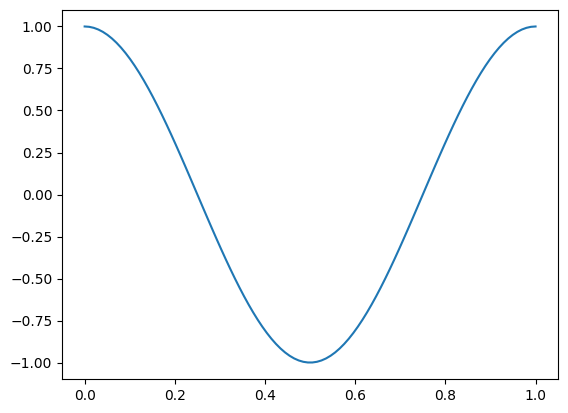

In [9]:
plt.plot(x,y)